The plan of Exploratory Data Analysis (EDA)
1.  General analysis of the dataset using basic reasonable assumptions (what's the data in general?)
2.  Checking the data using basic statistics to detect outliers
3.  Conclusions: usability of data subsets based on the elements distributions

1.  General analysis of the dataset 

In [1]:
import pandas as pd # lets extract data from xls file to the DataFrame
ds = pd.read_excel (r'Porphyry Cu Geochemistry Module1.xlsx')
# replace Nan with zeros
ds = ds.fillna(0)
# check the list of columns
columns_list = ds.columns.values.tolist()
f"{columns_list}" 

"['Sample', 'East', 'North', 'Elevation', 'holeid', 'from', 'to', 'Ag_ppm', 'Al_pct', 'As_ppm', 'Ba_ppm', 'Be_ppm', 'Bi_ppm', 'Ca_pct', 'Cd_ppm', 'Ce_ppm', 'Co_ppm', 'Cr_ppm', 'Cs_ppm', 'Fe_pct', 'Ga_ppm', 'Ge_ppm', 'Hf_ppm', 'In_ppm', 'K_pct', 'La_ppm', 'Li_ppm', 'Mg_pct', 'Mn_ppm', 'Mo_ppm', 'Na_pct', 'Nb_ppm', 'Ni_ppm', 'P_ppm', 'Pb_ppm', 'Rb_ppm', 'Re_ppm', 'S_pct', 'Sb_ppm', 'Sc_ppm', 'Se_ppm', 'Sn_ppm', 'Sr_ppm', 'Ta_ppm', 'Te_ppm', 'Th_ppm', 'Ti_pct', 'Tl_ppm', 'U_ppm', 'V_ppm', 'W_ppm', 'Y_ppm', 'Zn_ppm', 'Zr_ppm', 'SiO2']"

Because of high concentration, these elements Al_pct, Fe_pct, S_pct, Na_pct, Ti_pct, SiO2 was measured in weight percent and marked as "_pct". 

1.1  Geospatial data 

In [2]:
f"{ds['East'].iloc[0], ds['North'].iloc[0]}" # to check the type of geospatial coordinates

'(12653.604888000002, 5949.422691999935)'

So the geospatial data is in the local rectangular coordinate system, not in wgs84.

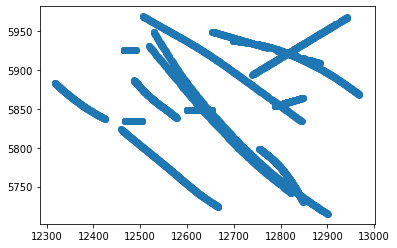

In [3]:
import matplotlib.pyplot as plt
plt.scatter(ds['East'], ds['North'])
plt.show() # 2D projection 

1.2 3D visualization

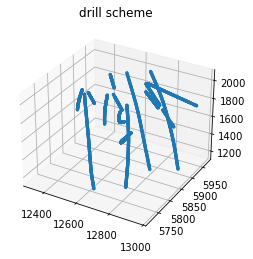

In [4]:
ax3d= plt.axes(projection ='3d')
# plotting 3D
ax3d.scatter(ds['East'], ds['North'], ds['Elevation'],marker='.')
ax3d.set_title('drill scheme')
plt.show()


So we have the dataset that contains drill hole samples.

In [5]:
#This dataset contains concentration values <0.  
min(ds['Ta_ppm']) 

-0.05

This value means that the limit of detection (LOD) of Tantalum is 0.1, the values <0 is = -0.5*LOD

In [6]:
import numpy as np
import math
from scipy.stats import skew, kurtosis
#initialization of dispersion, skew, kurtosis lists 
disp_m2_list=[]  #empty standard deviation list
assym_m3_list=[]  #empty skew list
exce_m4_list=[] #empty kurtosis list
columns_list_short=[] #empty column names list
marker_list=[] #empty marker list
#it's important to clean up variables for repeatable calculations
disp_m2_list.clear()
assym_m3_list.clear()
exce_m4_list.clear()
columns_list_short.clear()
marker_list.clear()
#calculate dispersion, skewness and kurtosis for each element
# chemical elements data located in range of column 7 to end 
for i in range(7,len(columns_list)): 
    name=columns_list[i]   
    
    #you may comment one of the next lines to see variance or standard distribution 
    m2=math.sqrt(np.var(ds[name]))  #standard distribution  
    m2=np.var(ds[name])  #variance   

    m3=skew(ds[name]) 
    m4=kurtosis(ds[name]) 
    disp_m2_list.append(m2) #there will be standard deviation or variance
    assym_m3_list.append(m3)
    exce_m4_list.append(m4)
    columns_list_short.append(name)
#    print( "{0} {1} {2} {3} ".format( name,m2,m3,m4 )  )

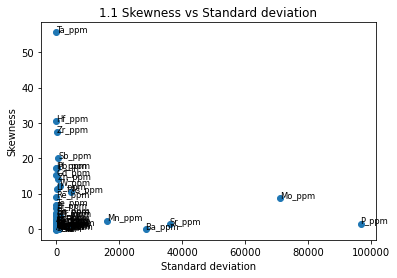

In [7]:
plt.scatter(disp_m2_list, assym_m3_list)
plt.title('1.1 Skewness vs Standard deviation') 
plt.xlabel('Standard deviation')
plt.ylabel('Skewness')
for i in range(0,len(disp_m2_list)): 
    plt.text(disp_m2_list[i], assym_m3_list[i], columns_list_short[i][0:6], horizontalalignment='left', size='small', color='black')
plt.show()

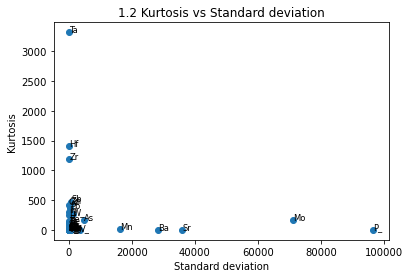

In [8]:
plt.scatter(disp_m2_list,  exce_m4_list)
plt.title('1.2 Kurtosis vs Standard deviation')  
plt.xlabel('Standard deviation')
plt.ylabel('Kurtosis')
for i in range(0,len(disp_m2_list)): 
    plt.text(disp_m2_list[i], exce_m4_list[i], columns_list_short[i][0:2], horizontalalignment='left', size='small', color='black')
plt.show()

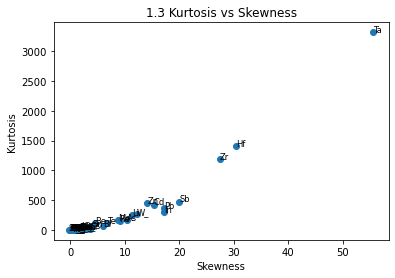

In [9]:
plt.scatter(assym_m3_list,exce_m4_list)
plt.title('1.3 Kurtosis vs Skewness') 
plt.xlabel('Skewness')
plt.ylabel('Kurtosis')
for i in range(0,len(disp_m2_list)): 
    plt.text(assym_m3_list[i], exce_m4_list[i], columns_list_short[i][0:2], horizontalalignment='left', size='small', color='black')
plt.show()

Preliminary conclusions:

1. The laboratory measurements of elements Mo,Ba,Sr,P looks strange.
2. The data-series for elements Ta,Hf,Zr may contains a few outliers
3. Tantalum value with index 1872 is outlier. There is 2 way what to do with compromised sample, exclude only wrong value or exclude sample data.
4. This value <0 means that the limit of detection of element is = -0.5*LOD 

3.  Usability of data subsets

3.1 What's strange with the tantalum ?

(array([3.604e+03, 2.210e+02, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-0.05 ,  0.437,  0.924,  1.411,  1.898,  2.385,  2.872,  3.359,
         3.846,  4.333,  4.82 ,  5.307,  5.794,  6.281,  6.768,  7.255,
         7.742,  8.229,  8.716,  9.203,  9.69 , 10.177, 10.664, 11.151,
        11.638, 12.125, 12.612, 13.099, 13.586, 14.073, 14.56 , 15.047,
        15.534, 16.021, 16.508, 16.995, 17.482, 17.969, 18.456, 18.943,
        19.43 , 

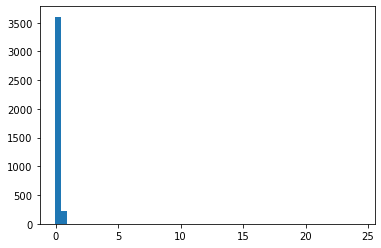

In [10]:
plt.hist(ds['Ta_ppm'],bins=50) #tantalum distribution histogram

In [11]:
#sort and print top 10 values
local_Ta_ppm = ds.sort_values(by='Ta_ppm',ascending=False)    
local_Ta_ppm['Ta_ppm'].head(10)
# the value with index 1872 is outlier

1872    24.30
837      1.26
1950     1.17
1825     1.09
2427     0.94
3037     0.89
2957     0.85
3737     0.67
1346     0.66
1271     0.64
Name: Ta_ppm, dtype: float64

Some times, better decision for compromised or contaminated sample is to exclude all sample data from analysis. Data perfectionism is the way to stay without data. The main idea of EDA is а reasonable compromise to save maximum data with acceptable ambiguity level.

In [12]:
#initialization and clean up
disp_m2_list=[]
assym_m3_list=[]
exce_m4_list=[]
columns_list_short=[]
marker_list=[]
disp_m2_list.clear()
assym_m3_list.clear()
exce_m4_list.clear()
columns_list_short.clear()
marker_list.clear()
#calculate dispersion, skewness and kurtosis statistics values
for i in range(7,len(columns_list)): 
    if columns_list[i] not in ['Mn_ppm','Ba_ppm','Sr_ppm','Mo_ppm','P_ppm','Ta_ppm','Hf_ppm','Zr_ppm','As_ppm','V_ppm'] :       
        name=columns_list[i]
        m2=math.sqrt(np.var(ds[name]))
        m3=skew(ds[name]) 
        m4=kurtosis(ds[name]) 
        disp_m2_list.append(m2)
        assym_m3_list.append(m3)
        exce_m4_list.append(m4)
        columns_list_short.append(name)
        if   name[-1] == "m":
            marker_list.append('red')
        else:
            marker_list.append('blue')                
   # print( "{0} {1} {2} {3} ".format( name, m2, m3, m4 )  )

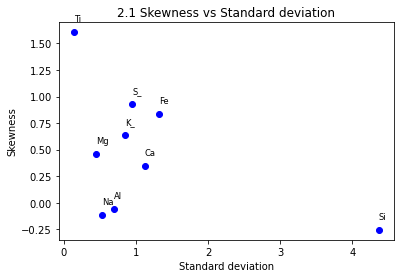

In [13]:
plt.clf()
plt.title('2.1 Skewness vs Standard deviation') 
plt.xlabel('Standard deviation')
plt.ylabel('Skewness')
for i in range(0,len(disp_m2_list)): 
    # only the main elements with concentration in pct, so detect the "t" character in the end of the name
    if  columns_list_short[i][-1] in ["t","2"]: 
        plt.scatter(disp_m2_list[i], assym_m3_list[i],color = marker_list[i])
        plt.text(disp_m2_list[i], assym_m3_list[i]+0.1, columns_list_short[i][0:2], horizontalalignment='left', size='small', color='black')
plt.show()

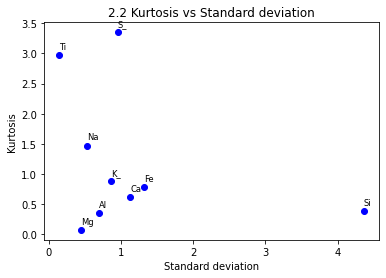

In [14]:
plt.clf()
plt.title('2.2 Kurtosis vs Standard deviation')  
plt.xlabel('Standard deviation')
plt.ylabel('Kurtosis')
#plt.axis([-1, 10, -1, 5])
for i in range(0,len(disp_m2_list)): 
    if  columns_list_short[i][-1] in ["t","2"]:   # if found "t" character at the end the element name, it is main element
        plt.scatter(disp_m2_list[i], exce_m4_list[i],color = marker_list[i])
        plt.text(disp_m2_list[i], exce_m4_list[i]+0.1, columns_list_short[i][0:2], horizontalalignment='left', size='small', color='black')
        #print (disp_m2_list[i], exce_m4_list[i],columns_list_short[i])
plt.show()

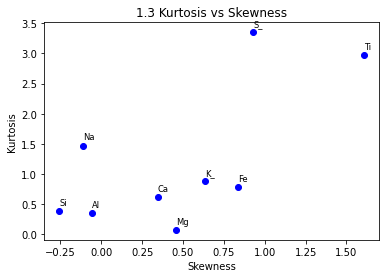

In [15]:
plt.title('1.3 Kurtosis vs Skewness') 
plt.xlabel('Skewness')
plt.ylabel('Kurtosis')
for i in range(0,len(disp_m2_list)): 
      if  columns_list_short[i][-1] in ["t","2"]:  # if found "t" character at the end the element name, it is main element
        plt.scatter(assym_m3_list[i], exce_m4_list[i],color = marker_list[i])
        plt.text(assym_m3_list[i], exce_m4_list[i]+0.1, columns_list_short[i][0:2], horizontalalignment='left', size='small', color='black')
plt.show()

3.2 Interesting view of the titanium "Ti_pct" 


Kurtosis = 2.97 (for the normal distribution = 3), Skewness = 0.147 (for the normal distribution = 0)  So, it's looks like normal distribution, possibly a bimodal distribution.

(array([ 19.,  13.,  22.,  55.,  50.,  51.,  98., 157., 182., 228., 275.,
        330., 323., 356., 260., 221., 174., 151., 106., 105.,  72.,  47.,
         48.,  38.,  29.,  46.,  36.,  27.,  22.,  21.,  18.,   8.,  18.,
         21.,  21.,  18.,  16.,  17.,  11.,  20.,  19.,  23.,  14.,  13.,
         10.,   6.,   4.,   6.,   1.,   4.]),
 array([0.061  , 0.07896, 0.09692, 0.11488, 0.13284, 0.1508 , 0.16876,
        0.18672, 0.20468, 0.22264, 0.2406 , 0.25856, 0.27652, 0.29448,
        0.31244, 0.3304 , 0.34836, 0.36632, 0.38428, 0.40224, 0.4202 ,
        0.43816, 0.45612, 0.47408, 0.49204, 0.51   , 0.52796, 0.54592,
        0.56388, 0.58184, 0.5998 , 0.61776, 0.63572, 0.65368, 0.67164,
        0.6896 , 0.70756, 0.72552, 0.74348, 0.76144, 0.7794 , 0.79736,
        0.81532, 0.83328, 0.85124, 0.8692 , 0.88716, 0.90512, 0.92308,
        0.94104, 0.959  ]),
 <BarContainer object of 50 artists>)

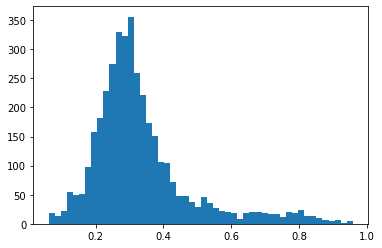

In [16]:
plt.hist(ds['Ti_pct'],bins=50) #titanium

Next steps in "geochem_sql2.ipynb" file.